In [1]:
!wget https://csv.tardis.dev/samples/Deribit_OPTIONS_options_chain_2020-07-01_2020-07-31.csv.gz

--2022-03-19 01:43:03--  https://csv.tardis.dev/samples/Deribit_OPTIONS_options_chain_2020-07-01_2020-07-31.csv.gz
Resolving csv.tardis.dev (csv.tardis.dev)... 172.67.72.60, 104.26.14.246, 104.26.15.246, ...
Connecting to csv.tardis.dev (csv.tardis.dev)|172.67.72.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14951138280 (14G) [application/x-gzip]
Saving to: ‘Deribit_OPTIONS_options_chain_2020-07-01_2020-07-31.csv.gz’

Deribit_OPTIONS_opt 100%[===================>]  13.92G  14.7MB/s    in 13m 42s 

2022-03-19 01:56:46 (17.3 MB/s) - ‘Deribit_OPTIONS_options_chain_2020-07-01_2020-07-31.csv.gz’ saved [14951138280/14951138280]



In [67]:
!pip install -q pyfolio

     |████████████████████████████████| 91 kB 8.1 MB/s 
     |████████████████████████████████| 52 kB 1.6 MB/s 


In [1]:
import pandas as pd
import pyfolio as pf

/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


Display sample of data for ETH options

In [3]:
pd.read_csv('Deribit_OPTIONS_options_chain_2020-07-01_2020-07-31.csv.gz', compression='gzip', nrows=5)

,exchange,symbol,timestamp,local_timestamp,type,strike_price,expiration,open_interest,last_price,bid_price,...,ask_iv,mark_price,mark_iv,underlying_index,underlying_price,delta,gamma,vega,theta,rho
0,deribit,BTC-3JUL20-9500-C,1593561597178000,1593561600161993,call,9500,1593763200000000,1186.0,0.0035,0.0030,...,52.12,0.003461,49.50,SYN.BTC-3JUL20,9136.98,0.16736,0.00069,1.83013,-19.41256,0.09573
1,deribit,BTC-3JUL20-9250-P,1593561598001000,1593561600161994,put,9250,1593763200000000,785.0,0.0205,0.0195,...,48.45,0.022261,47.63,SYN.BTC-3JUL20,9137.12,-0.61919,0.00109,2.78342,-28.40972,-0.37467
2,deribit,BTC-3JUL20-8250-P,1593561592616000,1593561600161995,put,8250,1593763200000000,468.8,0.0015,0.0010,...,80.88,0.001244,77.79,SYN.BTC-3JUL20,9136.84,-0.04719,0.00017,0.71940,-11.36439,-0.02829
3,deribit,BTC-3JUL20-7750-P,1593561597884000,1593561600161997,put,7750,1593763200000000,306.3,0.0005,NaN,...,110.75,0.000283,91.41,SYN.BTC-3JUL20,9137.12,-0.01103,0.00004,0.21207,-2.58385,-0.00661
4,deribit,BTC-3JUL20-6750-C,1593561594862000,1593561600161998,call,6750,1593763200000000,0.0,NaN,0.0855,...,500.00,0.261225,91.78,SYN.BTC-3JUL20,9136.71,0.99998,0.00000,0.00050,-0.00991,0.43150


In [4]:
# pick ETH options
!zcat -c Deribit_OPTIONS_options_chain_2020-07-01_2020-07-31.csv.gz | grep ETH > deribit_ETH.csv

In [5]:
# grep for long butterfly
!grep ETH-31JUL20-260-C deribit_ETH.csv > deribit_ETH_31JUL20_260_C.csv
!grep ETH-31JUL20-230-C deribit_ETH.csv > deribit_ETH_31JUL20_230_C.csv
!grep ETH-31JUL20-200-C deribit_ETH.csv > deribit_ETH_31JUL20_200_C.csv

Plot one option (choose any option) price as function of time

In [3]:
cols = pd.read_csv('Deribit_OPTIONS_options_chain_2020-07-01_2020-07-31.csv.gz', compression='gzip', nrows=20).columns

In [ ]:
df = pd.read_csv('/content/deribit_ETH_31JUL20_230_C.csv', names=cols, header=None)
df['datetime'] = pd.to_datetime(df['local_timestamp'], unit='us')

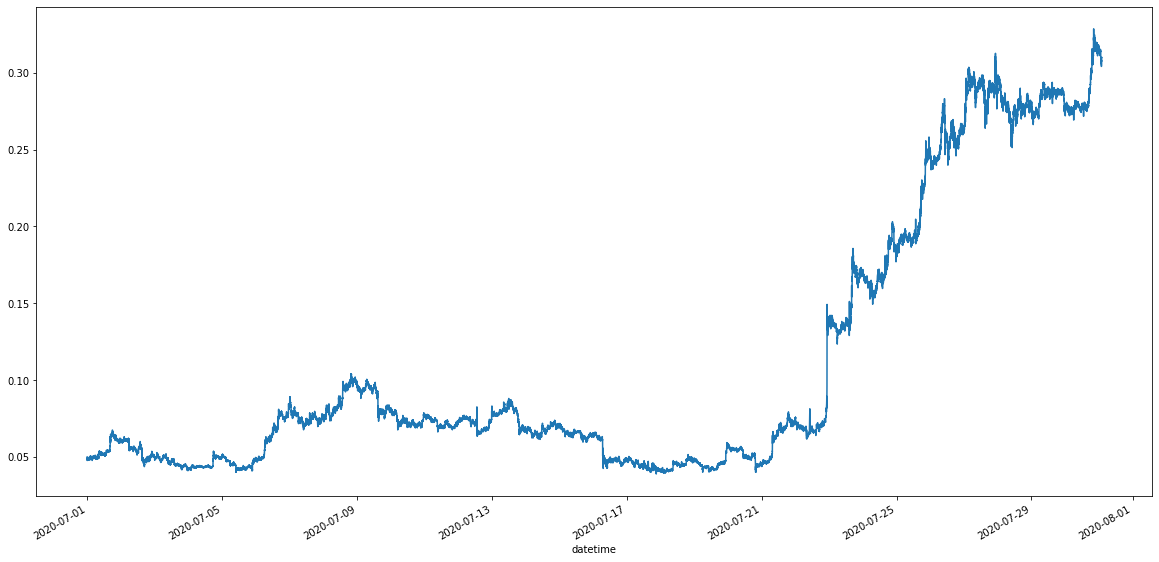

In [ ]:
df.set_index('datetime').mark_price.plot(figsize=(20, 10))

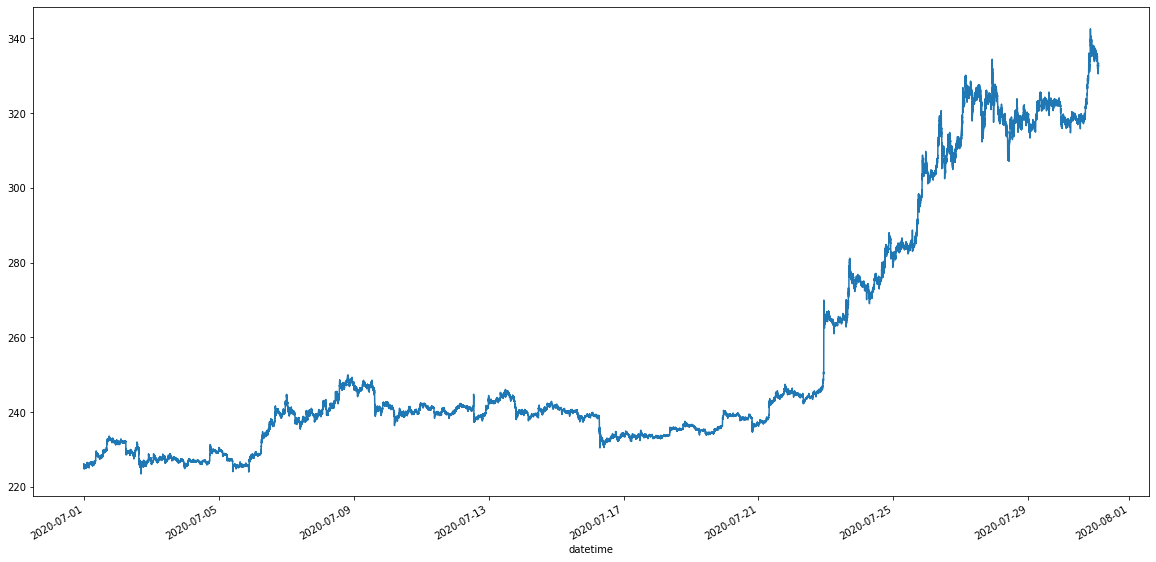

In [ ]:
# check the price of underlying from 2020-07-01 to 2020-07-31
df.set_index('datetime').underlying_price.plot(figsize=(20, 10))

In [30]:
long_leg_1 = pd.read_csv('/content/deribit_ETH_31JUL20_200_C.csv', names=cols, header=None)
long_leg_1['datetime'] = pd.to_datetime(long_leg_1['local_timestamp'], unit='us')

long_leg_2 = pd.read_csv('/content/deribit_ETH_31JUL20_260_C.csv', names=cols, header=None)
long_leg_2['datetime'] = pd.to_datetime(long_leg_2['local_timestamp'], unit='us')

short_leg = pd.read_csv('/content/deribit_ETH_31JUL20_230_C.csv', names=cols, header=None)
short_leg['datetime'] = pd.to_datetime(short_leg['local_timestamp'], unit='us')

In [31]:
long_leg_1['ask_price'].head()

0    0.143
1    0.143
2    0.143
3    0.143
4    0.143
Name: ask_price, dtype: float64

In [32]:
long_leg_2['ask_price'].head()

0    0.0165
1    0.0165
2    0.0165
3    0.0165
4    0.0165
Name: ask_price, dtype: float64

In [33]:
short_leg['bid_price'].head()

0    0.047
1    0.047
2    0.047
3    0.047
4    0.047
Name: bid_price, dtype: float64

In [40]:
cost = - short_leg['bid_price'].values[0] * 2 + long_leg_1['ask_price'].values[0] + long_leg_2['ask_price'].values[0]
cost

0.06549999999999999

In [41]:
butterfly_return = long_leg_1.set_index('datetime')['mark_price'].diff().resample('1d').sum() \
+ long_leg_2.set_index('datetime')['mark_price'].diff().resample('1d').sum()\
- short_leg.set_index('datetime')['mark_price'].diff().resample('1d').sum() * 2

butterfly_return.loc['2020-06-30'] = - cost
butterfly_return = butterfly_return.sort_index()

In [42]:
# https://github.com/quantopian/pyfolio/issues/661
# change /usr/local/lib/python3.7/dist-packages/pyfolio/timeseries.py

Start date,2020-06-30
End date,2020-07-31
Total months,1
,Backtest
Annual return,-61.0%
Cumulative returns,-11.3%
Annual volatility,22.3%
Sharpe ratio,-4.10
Calmar ratio,-5.41
Stability,0.47
Max drawdown,-11.3%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,7.34,2020-07-20,2020-07-30,NaT,NaN
1,1.37,2020-07-03,2020-07-08,2020-07-13,7
2,0.78,2020-07-17,2020-07-19,2020-07-20,2
3,0.06,2020-07-13,2020-07-14,2020-07-15,3
4,0.00,2020-06-30,2020-06-30,2020-06-30,1


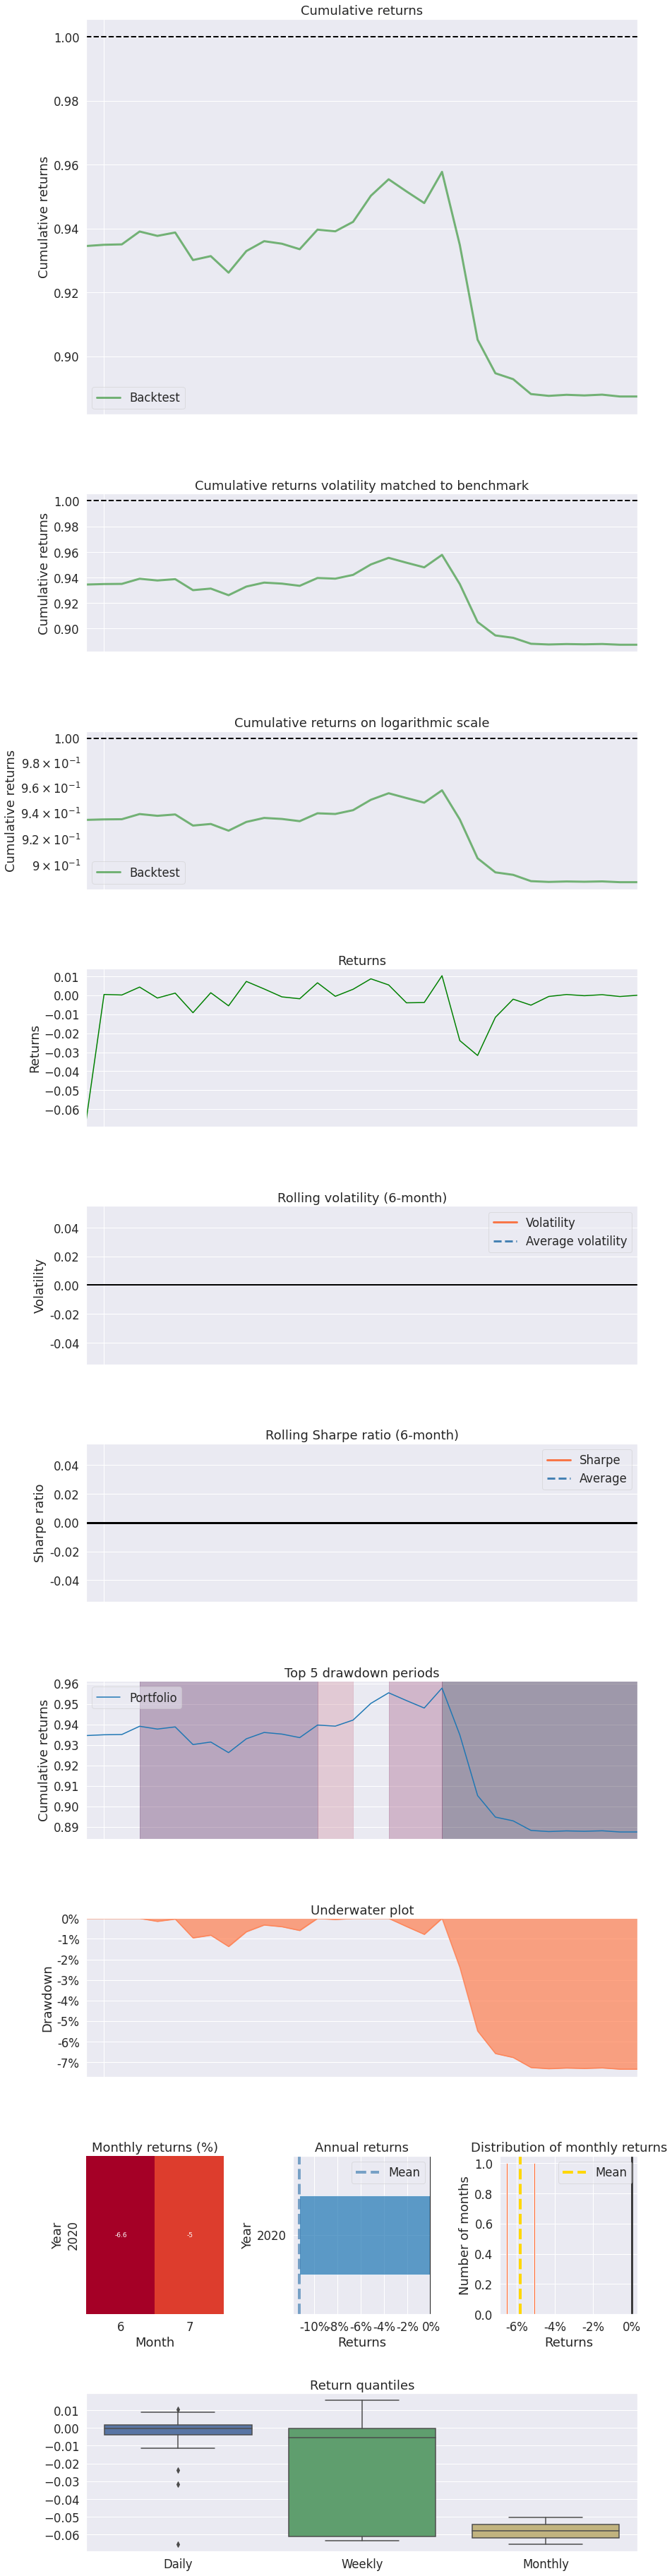

In [43]:
pf.create_returns_tear_sheet(butterfly_return)

Plot 10 day ATM volatility as function of current time

In [ ]:
!grep -E 'ETH-31JUL20-240-P|ETH-31JUL20-250-P|ETH-31JUL20-250-P|ETH-31JUL20-260-P|ETH-31JUL20-270-P|ETH-31JUL20-280-P|ETH-31JUL20-290-P|ETH-31JUL20-300-P|ETH-31JUL20-310-P|ETH-31JUL20-320-P|ETH-31JUL20-330-P|ETH-31JUL20-340-P'  deribit_ETH.csv > deribit_ETH_atm_vol_10day.csv

In [ ]:
df = pd.read_csv('/content/deribit_ETH_atm_vol_10day.csv', names=cols, header=None)
df['datetime'] = pd.to_datetime(df['local_timestamp'], unit='us')

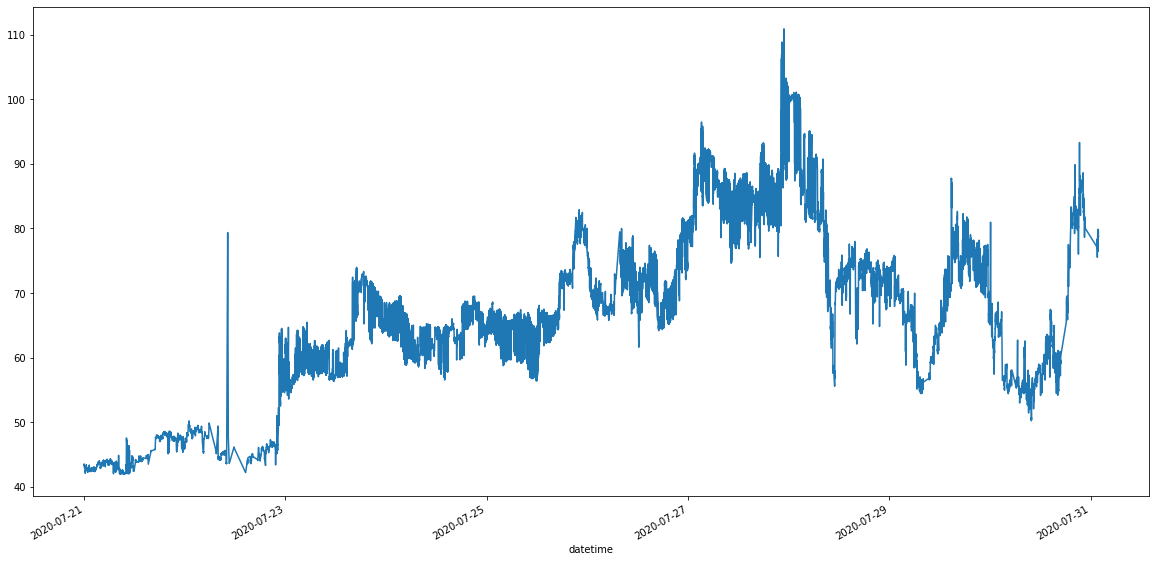

In [ ]:
df[(df.delta > -0.6) & (df.delta < -0.4)].set_index('datetime')['2020-07-21':].mark_iv.plot(figsize=(20, 10))

In [ ]:
# we know that long butterfly is actually betting the realized volatility in the future to be lower than the implied volatility
# the above graph shows that the atm iv increased which is likely to be the reason of losses

In [ ]:
import pandas as pd

Plot 10 day ATM skew as function of time

In [ ]:
!grep 'ETH-31JUL20'  deribit_ETH.csv > deribit_ETH_atm_skew_10day.csv

In [ ]:
df = pd.read_csv('/content/deribit_ETH_atm_skew_10day.csv', names=cols, header=None)
df['datetime'] = pd.to_datetime(df['local_timestamp'], unit='us')

In [ ]:
call_d25 = df[(df.type == 'call') & (df.delta < 0.3) & (df.delta > 0.2)]
put_d25 = df[(df.type == 'put') & (df.delta > -0.3) & (df.delta < -0.2)]
put_d50 = df[(df.type == 'put') & (df.delta > -0.55) & (df.delta < -0.45)]

ivs = pd.merge_asof(pd.merge_asof(put_d50.set_index('datetime')['mark_iv'], 
              call_d25.set_index('datetime')['mark_iv'],
              left_index=True, right_index=True, direction='forward'),
              put_d25.set_index('datetime')['mark_iv'],
              left_index=True, right_index=True, direction='forward')

In [ ]:
ivs.columns = ['iv_d50', 'call_iv_d25', 'put_iv_25']

In [ ]:
ivs['skew'] = (ivs['put_iv_25'] - ivs['call_iv_d25']) / ivs['iv_d50']

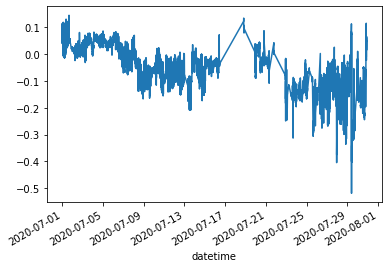

In [ ]:
ivs['skew'].plot()

Reproduce using Black scholes formulas price and delta of the option, compare to deribit’s output

In [ ]:
import math
from math import log, sqrt, exp
from scipy import stats
from typing import Tuple

class BSMOptionValuation:
    """
    Valuation of European call options in Black-Scholes-Merton Model (incl. dividend)
    Attributes
    ==========
    S0: float
        initial stock/index level
    K: float
        strike price
    T: float
        time to maturity (in year fractions)
    r: float
        constant risk-free short rate
        assume flat term structure
    sigma: float
        volatility factor in diffusion term
    div_yield: float
        dividend_yield, in percentage %, default = 0.0%
    """

    def __init__(self, S0: float, K: float, T: float, r: float, sigma: float, div_yield: float = 0.0):
        assert sigma >= 0, 'volatility cannot be less than zero'
        assert S0 >= 0, 'initial stock price cannot be less than zero'
        assert T >= 0, 'time to maturity cannot be less than zero'
        assert div_yield >= 0, 'dividend yield cannot be less than zero'

        self.S0 = float(S0)
        self.K = float(K)
        self.T = float(T)
        self.r = float(r)
        self.sigma = float(sigma)
        self.div_yield = float(div_yield)

        self.d1 = ((log(self.S0 / self.K) + (self.r - self.div_yield + 0.5 * self.sigma ** 2) * self.T) / (
                self.sigma * sqrt(self.T)))
        self.d2 = self.d1 - self.sigma * sqrt(self.T)

    def call_value(self, observed_put_price: float = None) -> float:
        """
        :return: call option value
        """
        if observed_put_price is None:
            call_value = (self.S0 * exp(-self.div_yield * self.T) * stats.norm.cdf(self.d1, 0.0, 1.0) - self.K * exp(
                -self.r * self.T) * stats.norm.cdf(self.d2, 0.0, 1.0))
        else:
            call_value = observed_put_price + exp(-self.div_yield * self.T) * self.S0 - exp(-self.r * self.T) * self.K

        return call_value

    def delta(self) -> Tuple[float, float]:
        """
        Delta measures the change in the option price for a $1 change in the stock price
        :return: delta of the option
        """
        delta_call = exp(- self.div_yield * self.T) * stats.norm.cdf(self.d1, 0.0, 1.0)
        delta_put = -exp(- self.div_yield * self.T) * stats.norm.cdf(-self.d1, 0.0, 1.0)

        return delta_call, delta_put

    def gamma(self) -> float:
        """
        Gamma measures the change in delta when the stock price changes
        :return: gamma of the option
        """
        gamma = exp(-self.div_yield * self.T) * stats.norm.pdf(self.d1) / (self.S0 * self.sigma * sqrt(self.T))

        return gamma

    def theta(self) -> Tuple[float, float]:
        """
        Theta measures the change in the option price with respect to calendar time (t ),
        holding fixed time to expiration (T).
        If time to expiration is measured in years, theta will be the annualized change in the option value.
        To obtain a per-day theta, divide by 252.
        :return: theta of the option
        """
        part1 = self.div_yield * self.S0 * exp(-self.div_yield * self.T) * stats.norm.cdf(self.d1)
        part2 = self.r * self.K * stats.norm.cdf(self.d2)
        part3 = (self.K * exp(-self.r * self.T) * stats.norm.pdf(self.d2) * self.sigma) / (2 * sqrt(self.T))

        theta_call = part1 - part2 - part3
        theta_put = theta_call + self.r * self.K * exp(-self.r * self.T) - self.div_yield * self.S0 * exp(
            -self.div_yield * self.T)

        return theta_call, theta_put

    def vega(self) -> float:
        """
        Vega measures the change in the option price when volatility changes. Some writers also
        use the terms lambda or kappa to refer to this measure:
        It is common to report vega as the change in the option price per percentage point change
        in the volatility. This requires dividing the vega formula above by 100.
        :return: vega of option
        """
        vega = self.S0 * exp(-self.div_yield * self.T) * stats.norm.pdf(self.d1, 0.0, 1.0) * sqrt(self.T)

        return vega

    def rho(self) -> Tuple[float, float]:
        """
        Returns: call_rho, put_rho
        -------
        Rho is the partial derivative of the option price with respect to the interest rate.
        These expressions for rho assume a change in r of 1.0. We are typically interested in
        evaluating the effect of a change of 0.01 (100 basis points) or 0.0001 (1 basis point). To
        report rho as a change per percentage point in the interest rate, divide this measure by 100.
        To interpret it as a change per basis point, divide by 10,000.
        """
        call_rho = self.T * self.K * exp(-self.r * self.T) * stats.norm.cdf(self.d2)
        put_rho = -self.T * self.K * exp(-self.r * self.T) * stats.norm.cdf(-self.d2)

        return call_rho, put_rho

    def psi(self) -> Tuple[float, float]:
        """
        Returns: call_psi, put psi
        -------
        Psi is the partial derivative of the option price with respect to the continuous dividend yield:
        To interpret psi as a price change per percentage point change in the dividend yield, divide
        by 100.
        """
        call_psi = - self.T * self.S0 * exp(-self.div_yield * self.T) * stats.norm.cdf(self.d1)
        put_psi = self.T * self.S0 * exp(-self.div_yield * self.T) * stats.norm.cdf(-self.d1)

        return call_psi, put_psi

    def implied_vol(self, observed_call_price: float, iteration: int = 1000) -> float:
        """
        Newton-Raphson iterative approach, assuming BSM model
        :param observed_call_price: call price from the market
        :param iteration: no. of iteration
        :return: implied volatility given option price
        """

        for _ in range(iteration):
            self.sigma -= (self.call_value() - observed_call_price) / self.vega()

        return self.sigma
    
    def put_value(self, observed_call_price: float = None) -> float:
        """
        Use put call parity (incl. continuous dividend) to calculate the put option value
        :return: put option value
        """
        if observed_call_price is None:
            put_value = self.call_value() + exp(-self.r * self.T) * self.K - exp(-self.div_yield * self.T) * self.S0
        else:
            put_value = observed_call_price + exp(-self.r * self.T) * self.K - exp(-self.div_yield * self.T) * self.S0

        return put_value

    def lookback_BSM(self, option_type: str, max_share_price: float, min_share_price: float) -> float:
        """
        A European lookback call at maturity pays St - min(St).
        A European lookback put at maturity pays max(St) - St.
        min(St) is the minimum price over the life of the option
        max(St) is the maximum price over the life of the option
        Robert. L. MacDonald: Derivatives Markets (3rd. edition)
        Chapter 23: Exotic Option II
        Formula 23.47 (Exercise)
        :param option_type: call, put
        :param max_share_price: maximum share price
        :param min_share_price: minimum share price
        :return: value of lookback option
        """

        assert option_type == "call" or option_type == "put"

        if option_type == "call":
            self.w = 1
            self.s_bar = float(min_share_price)

        elif option_type == "put":
            self.w = -1
            self.s_bar = float(max_share_price)

        self.d5 = (log(self.K / self.s_bar) + (self.r - self.div_yield + 0.5 * (self.sigma ** 2)) * self.T) / (
                self.sigma * sqrt(self.T))
        self.d6 = self.d5 - self.sigma * sqrt(self.T)
        self.d7 = (log(self.s_bar / self.K) + (self.r - self.div_yield + 0.5 * (self.sigma ** 2)) * self.T) / (
                self.sigma * sqrt(self.T))
        self.d8 = self.d7 - self.sigma * sqrt(self.T)

        # Lookback option pricing
        self.lb_first_part = self.w * self.K * exp(-self.div_yield * self.T) * (
                stats.norm.cdf(self.w * self.d5) - (self.sigma ** 2) * stats.norm.cdf(-self.w * self.d5) / (
                2 * (self.r - self.div_yield)))
        self.lb_second_part = self.w * self.s_bar * exp(-self.r * self.T) * (stats.norm.cdf(self.w * self.d6) - (
                (self.sigma ** 2) / (2 * (self.r - self.div_yield)) * (self.K / self.s_bar) ** (
                1 - 2 * (self.r - self.div_yield) / (self.sigma ** 2))) * stats.norm.cdf(self.w * self.d8))

        return self.lb_first_part - self.lb_second_part

In [ ]:
from datetime import timedelta

df = pd.read_csv('/content/deribit_ETH_3JUL20_250_P.csv', names=cols, header=None)
df['datetime'] = pd.to_datetime(df['local_timestamp'], unit='us')

df['tte'] = (pd.to_datetime(df['expiration'], unit='us') - df['datetime']).dt.total_seconds() / timedelta(days=365).total_seconds()
df['mark_iv_dec'] = df['mark_iv'] / 100
df = df[df['tte'] > 0]

In [ ]:
df[['underlying_price', 'strike_price', 'tte', 'mark_iv_dec']].head()

,underlying_price,strike_price,tte,mark_iv_dec
0,225.59,250,0.006393,0.6934
1,225.59,250,0.006393,0.6933
2,225.55,250,0.006392,0.6933
3,225.55,250,0.006392,0.6933
4,225.54,250,0.006392,0.6933


In [ ]:
df['bs_price'] = df[['underlying_price', 'strike_price', 'tte', 'mark_iv_dec']].apply(lambda row: BSMOptionValuation(row['underlying_price'], row['strike_price'], row['tte'], 0.08, row['mark_iv_dec']).put_value() / row['underlying_price'], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['bs_delta'] = df[['underlying_price', 'strike_price', 'tte', 'mark_iv_dec']].apply(lambda row: BSMOptionValuation(row['underlying_price'], row['strike_price'], row['tte'], 0.08, row['mark_iv_dec']).delta()[-1], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Plot the difference to assess any discrepancy.

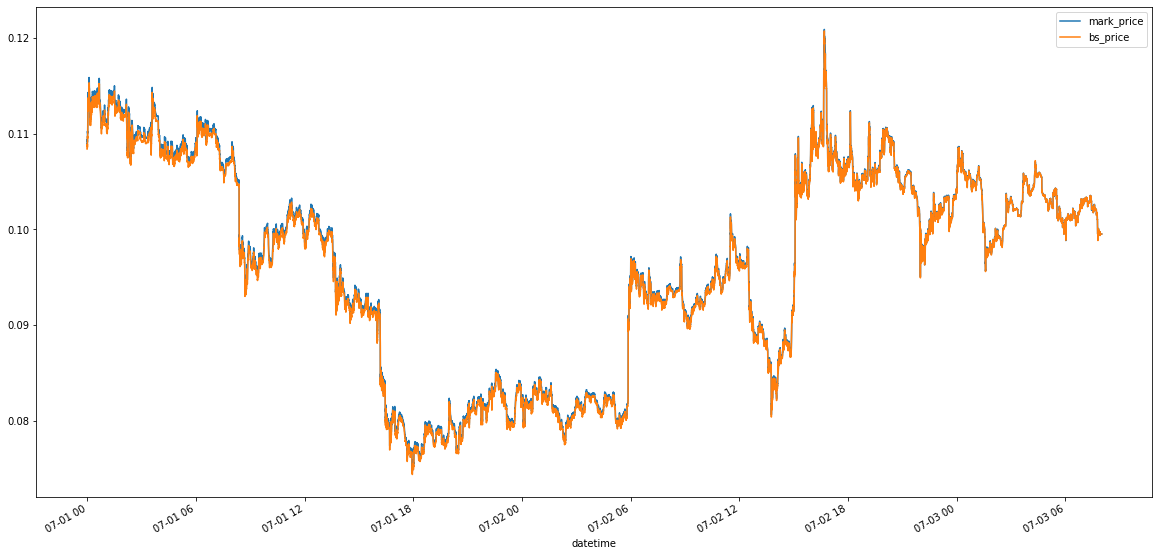

In [ ]:
df.set_index('datetime')[['mark_price', 'bs_price']].plot(figsize=(20, 10))

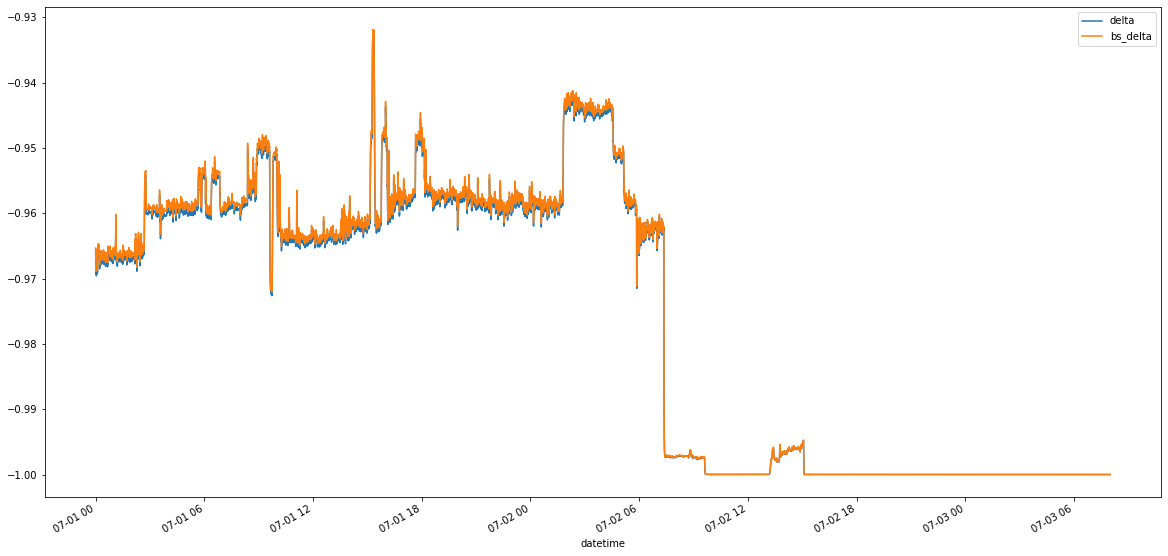

In [ ]:
df[df.delta != 0].set_index('datetime')[['delta', 'bs_delta']].plot(figsize=(20, 10))

Develop a model to predict implied volatility of weekly ATM option

In [ ]:
!pip install arch - q

     |████████████████████████████████| 902 kB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 40.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
df = pd.read_csv('/content/deribit_ETH_atm_skew_10day.csv', names=cols, header=None)
df['datetime'] = pd.to_datetime(df['local_timestamp'], unit='us')

In [ ]:
df = df.set_index('datetime')['2020-07-25':]

In [ ]:
df = df[(df.delta > -0.55) & (df.delta < -0.45)]

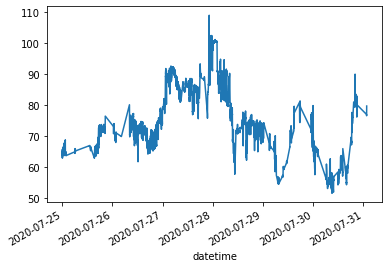

In [ ]:
df.mark_iv.plot()

In [ ]:
train = df.mark_iv.resample('60min').mean().fillna(method='ffill')

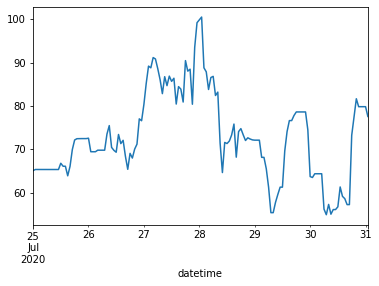

In [ ]:
train.plot()

In [ ]:
from arch import arch_model
model = arch_model(train, vol='GARCH', p=60, q=60)

In [ ]:
model_fit = model.fit()
yhat = model_fit.forecast(horizon=len(train))

Iteration:      1,   Func. Count:    124,   Neg. LLF: 541.9110785906015
Iteration:      2,   Func. Count:    248,   Neg. LLF: 518.3250758386026
Iteration:      3,   Func. Count:    372,   Neg. LLF: 515.9011548679256
Iteration:      4,   Func. Count:    496,   Neg. LLF: 515.1018977224169
Iteration:      5,   Func. Count:    621,   Neg. LLF: 513.7079547392241
Iteration:      6,   Func. Count:    746,   Neg. LLF: 512.6875007710398
Iteration:      7,   Func. Count:    871,   Neg. LLF: 511.1623256145028
Iteration:      8,   Func. Count:    995,   Neg. LLF: 510.69344961786794
Iteration:      9,   Func. Count: 1.12e+03,   Neg. LLF: 509.5871615882285
Iteration:     10,   Func. Count: 1.24e+03,   Neg. LLF: 501.71924609486774
Iteration:     11,   Func. Count: 1.37e+03,   Neg. LLF: 491.0693586620886
Iteration:     12,   Func. Count: 1.5e+03,   Neg. LLF: 487.1202548286808
Iteration:     13,   Func. Count: 1.62e+03,   Neg. LLF: 483.3717824821035
Iteration:     14,   Func. Count: 1.75e+03,   Neg. LL

/usr/local/lib/python3.7/dist-packages/arch/univariate/base.py:755: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


In [ ]:
train = train.reset_index()
train['forecast_iv'] = yhat.variance.values[-1]

Plot model prediction vs actual observation

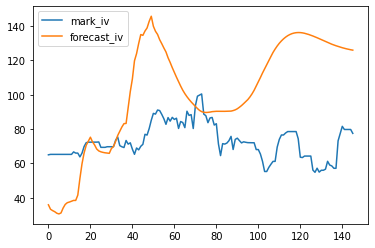

In [ ]:
train[['mark_iv', 'forecast_iv']].plot()

Check if option arbitrage is present at any time

In [ ]:
df = pd.read_csv('/content/deribit_ETH_atm_skew_10day.csv', names=cols, header=None)
# df['datetime'] = pd.to_datetime(df['local_timestamp'], unit='us')

In [ ]:
call_df = df[df.symbol == "ETH-31JUL20-200-C"]
put_df = df[df.symbol == "ETH-31JUL20-200-P"]
call_df_2 = df[df.symbol == "ETH-31JUL20-220-C"]

In [ ]:
from datetime import timedelta

def clean_df(data):
  data['datetime'] = pd.to_datetime(data['local_timestamp'], unit='us')

  data['tte'] = (pd.to_datetime(data['expiration'], unit='us') - data['datetime']).dt.total_seconds() / timedelta(days=365).total_seconds()
  data['mark_iv_dec'] = data['mark_iv'] / 100
  data = data[data['tte'] > 0]
  
  return data

In [ ]:
call_df = clean_df(call_df)
put_df = clean_df(put_df)
call_df_2 = clean_df(call_df_2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [ ]:
call_df = call_df.set_index('datetime')[['bid_price', 'ask_price', 'underlying_price', 'tte']]
call_df.columns = ['bid_px_c', 'ask_px_c', 'underlying_price', 'tte']

put_df = put_df.set_index('datetime')[['bid_price', 'ask_price']]
put_df.columns = ['bid_px_p', 'ask_px_p']

call_df_2 = call_df_2.set_index('datetime')[['bid_price', 'ask_price']]
call_df_2.columns = ['bid_px_c_2', 'ask_px_c_2']

In [ ]:
combined = pd.merge_asof(call_df, put_df, left_index=True, right_index=True, direction='forward', tolerance=pd.Timedelta('1s')).dropna()

In [ ]:
combined

,bid_px_c,ask_px_c,underlying_price,tte,bid_px_p,ask_px_p
datetime,,,,,,
2020-07-01 00:00:00.185818,0.1250,0.1430,226.20,0.083105,0.0175,0.0205
2020-07-01 00:00:09.768317,0.1250,0.1430,226.19,0.083105,0.0175,0.0205
2020-07-01 00:00:41.284718,0.1255,0.1430,226.12,0.083104,0.0180,0.0205
2020-07-01 00:00:46.575538,0.1250,0.1430,226.19,0.083104,0.0180,0.0205
2020-07-01 00:00:56.445099,0.1250,0.1430,226.07,0.083103,0.0180,0.0205
...,...,...,...,...,...,...
2020-07-25 20:25:26.598703,0.3175,0.3350,299.11,0.015020,0.0005,0.0010
2020-07-25 20:25:32.614000,0.3175,0.3350,299.13,0.015020,0.0005,0.0010
2020-07-25 20:25:38.607943,0.3175,0.3350,299.16,0.015020,0.0005,0.0010


In [ ]:
combined['bc_sp_edge'] = (combined['bid_px_p'] + combined['bid_px']) - (combined['ask_px_c'] + 18000 * np.exp(-r * combined['s_to_expiry'] / (365 * 24 * 60 * 60)) )

In [ ]:
import numpy as np

In [ ]:
combined['bc_sp_edge'] = (combined['bid_px_p']) - (combined['ask_px_c'])
combined['sc_bp_edge'] = (combined['ask_px_p']) - (combined['bid_px_c'])

In [ ]:
combined[combined['bc_sp_edge'] > 0]

,bid_px_c,ask_px_c,underlying_price,tte,bid_px_p,ask_px_p,bc_sp_edge,sc_bp_edge
datetime,,,,,,,,


In [ ]:
combined[combined['sc_bp_edge'] > 0]

,bid_px_c,ask_px_c,underlying_price,tte,bid_px_p,ask_px_p,bc_sp_edge,sc_bp_edge
datetime,,,,,,,,


In [ ]:
# No PCP arbitray opportunity for this stirke, there may be for other strikes

In [ ]:
combined = pd.merge_asof(call_df, call_df_2, left_index=True, right_index=True, direction='forward', tolerance=pd.Timedelta('1s')).dropna()

In [ ]:
combined[combined['bid_px_c_2'] > combined['ask_px_c']]

,bid_px_c,ask_px_c,underlying_price,tte,bid_px_c_2,ask_px_c_2
datetime,,,,,,


In [ ]:
# No call options convex price arbitrage for this strike

In [ ]:
df['datetime'] = pd.to_datetime(df['local_timestamp'], unit='us')

In [ ]:
put_d75 = df[(df.type == 'put') & (df.delta > -0.8) & (df.delta < -0.7)]
put_d25 = df[(df.type == 'put') & (df.delta > -0.3) & (df.delta < -0.2)]
put_d50 = df[(df.type == 'put') & (df.delta > -0.55) & (df.delta < -0.45)]

ivs = pd.merge_asof(pd.merge_asof(put_d50.set_index('datetime')['mark_iv'], 
              put_d75.set_index('datetime')['mark_iv'],
              left_index=True, right_index=True, direction='forward'),
              put_d25.set_index('datetime')['mark_iv'],
              left_index=True, right_index=True, direction='forward')

In [ ]:
ivs.columns = ['mark_iv_atm', 'mark_iv_itm', 'mark_iv_otm']

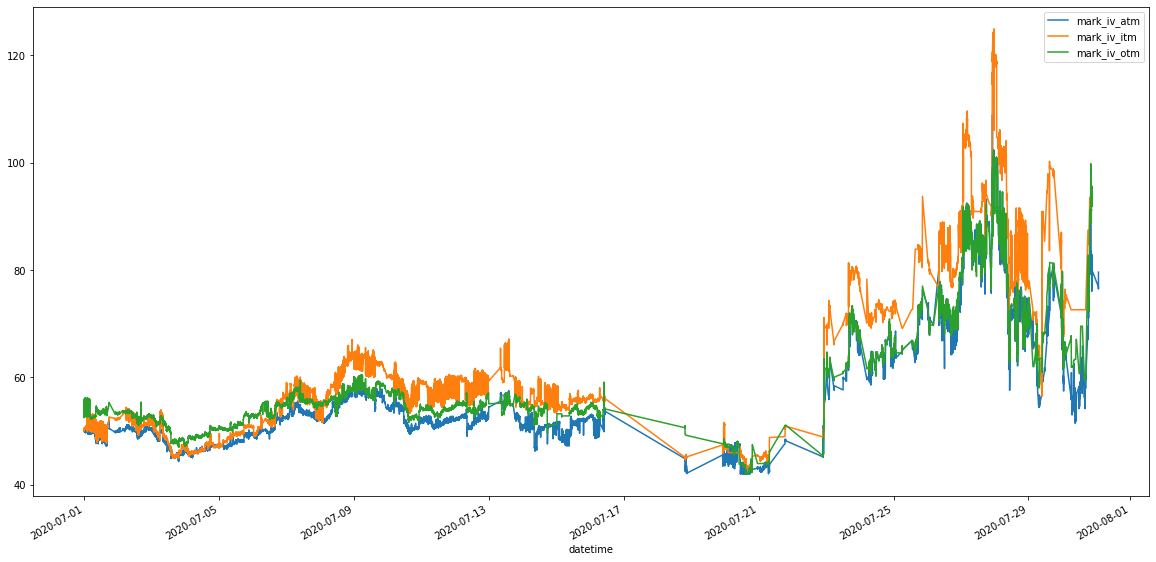

In [ ]:
ivs.plot(figsize=(20, 10))